In [1]:
from infra.amazondatasetloader import AmazonReviewsDatasetLoader
from infra.svdpredictor import SVDRatingPredictor
from core.util import task

/Users/unknownpgr/Desktop/rating/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = AmazonReviewsDatasetLoader().load_dataset()
train, test = dataset.split([0.8, 0.2])

 ⟍  Amazon review data load
   ⟍  Raw data loading
   ⟋  Raw data loading [+4911ms]
   ⟍  Data conversion
    |  Loaded 50000 ratings (0.10%) [+8839ms]
    |  Loaded 100000 ratings (0.20%) [+1778ms]
    |  Loaded 150000 ratings (0.30%) [+1654ms]
    |  Loaded 200000 ratings (0.40%) [+1502ms]
    |  Loaded 250000 ratings (0.50%) [+1491ms]
    |  Loaded 300000 ratings (0.61%) [+1459ms]
    |  Loaded 350000 ratings (0.71%) [+1551ms]
    |  Loaded 400000 ratings (0.81%) [+1484ms]
    |  Loaded 450000 ratings (0.91%) [+1478ms]
    |  Loaded 500000 ratings (1.01%) [+1471ms]
    |  Loaded 550000 ratings (1.11%) [+1477ms]
    |  Loaded 600000 ratings (1.21%) [+1699ms]
    |  Loaded 650000 ratings (1.31%) [+1586ms]
    |  Loaded 700000 ratings (1.41%) [+1476ms]
    |  Loaded 750000 ratings (1.51%) [+1458ms]
    |  Loaded 800000 ratings (1.62%) [+1472ms]
    |  Loaded 850000 ratings (1.72%) [+1473ms]
    |  Loaded 900000 ratings (1.82%) [+1482ms]
    |  Loaded 950000 ratings (1.92%) [+1491ms]
  

In [3]:
model_path = "model.npz"
predictor = SVDRatingPredictor(latent_dim=2)
try:
    predictor.load(model_path)
except:
    pass

In [9]:
history = []
with task("Training"):
    for i in range(1000):
        with task("Epoch %d" % (i + 1)):
            try:
                predictor.train(train)
                train_mse = predictor.evaluate(train)
                valid_mse = predictor.evaluate(test)
                history.append((train_mse, valid_mse))
                task.log("Train MSE      : %.4f" % train_mse)
                task.log("Validation MSE : %.4f" % valid_mse)
                predictor.save(model_path)
            except KeyboardInterrupt:
                task.log("Training interrupted")
                break

 ⟍  Training
   ⟍  Epoch 1


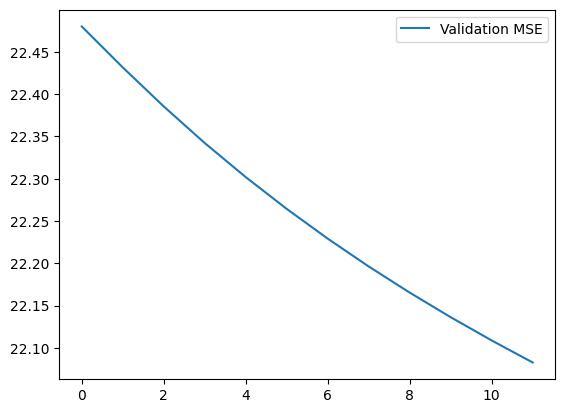

In [8]:
import matplotlib.pyplot as plt

train_mse, valid_mse = zip(*history)
plt.plot(valid_mse, label="Validation MSE")
plt.legend()
plt.show()